In [1]:
import sys
sys.path.insert(0, '../src/')

import pandas as pd
import kaggle
import auto_co2 as co2
import importlib
importlib.reload(co2)

2024-01-15 19:53:54.489145: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 19:53:54.505463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'auto_co2' from '/home/mln/GIT/car-co2-prediction_pre-release/notebooks/../src/auto_co2/__init__.py'>

In [2]:
df = co2.data.load_co2_data()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,295039,ES,IP MQB37WZ_A1_0589 VSS 1,VW-SAIC,SEAT,SEAT SA,nan,E9*2007/46*3167*07,KL,SBDTTCX0,FD7SFD7GC0024BIVL1BAF,SEAT,LEON,M1,M1,1,1448.000,nan,104.000,118.000,2669.000,1550.000,1520.000,DIESEL,M,1968.000,110.000,nan,e9 28 29,nan,1.700,nan,nan,P,2021,2021-01-11,4.500,nan
1,295040,ES,nan,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,nan,E13*2007/46*1845*17,A1,DLAAX0AC4,FM6FM6AJ0254BI1AANNMI,VOLKSWAGEN,T-ROC,M1,M1,1,1294.000,nan,nan,137.000,2590.000,1546.000,1540.000,PETROL,M,999.000,81.000,nan,E13 28 29,nan,nan,nan,nan,P,2021,2021-05-18,6.100,nan
2,295041,ES,IP-C482_2019_00002-WF0-1,FORD,FORD WERKE GMBH,FORD WERKE GMBH,nan,E13*2007/46*2188*03,DFK,YLDC1FX,577CJ6AP1AD,FORD,KUGA,M1,M1,1,1687.000,nan,113.000,135.000,2710.000,1596.000,1580.000,DIESEL,M,1995.000,110.000,nan,nan,nan,nan,nan,nan,P,2021,2021-03-24,nan,nan
3,295042,ES,nan,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,nan,E13*2007/46*1845*18,A1,DLAAX0AC4,FM6FM6AJ0254BI1AANNI0,VOLKSWAGEN,T-ROC,M1,M1,1,1294.000,nan,nan,137.000,2590.000,1546.000,1540.000,PETROL,M,999.000,81.000,nan,E13 29,nan,nan,nan,nan,P,2021,2021-05-18,6.100,nan
4,295043,ES,nan,STELLANTIS,OPEL AUTOMOBILE,OPEL AUTOMOBILE GMBH,nan,E2*2007/46*0597*19,Z,R,HNSK-C1P600,OPEL,GRANDLAND,M1,M1,1,1395.000,nan,114.000,140.000,2675.000,1595.000,1610.000,PETROL,M,1199.000,96.000,nan,nan,nan,2.100,nan,nan,P,2021,2021-02-25,6.200,nan


<class 'pandas.io.formats.style.Styler'>


,Column,Non-Null Count
0,ID,int64
1,Country,object
2,VFN,object
3,Mp,object
4,Mh,object
5,Man,object
6,MMS,float64
7,Tan,object
8,T,object
9,Va,object


<class 'pandas.io.formats.style.Styler'>


,Info
0,"RangeIndex: 9920108 entries, 0 to 9920107"
1,Data columns (total 38 columns):
2,37 Electric range (km) float64
3,"dtypes: float64(17), int64(3), object(18)"
4,memory usage: 2.8+ GB


<class 'pandas.io.formats.style.Styler'>


,Colonne,Valeurs manquantes (%)
0,Vf,100.00%
1,MMS,100.00%
2,Ernedc (g/km),100.00%
3,De,100.00%
4,Electric range (km),85.24%
5,z (Wh/km),83.63%
6,Enedc (g/km),75.63%
7,Erwltp (g/km),56.70%
8,IT,54.13%
9,Fuel consumption,40.73%


<class 'pandas.io.formats.style.Styler'>
Incomplete rows dropped:461538
TOTAL NUMBER OF ROWS DROPPED:461538


,Column,Non-Null Count
0,Pool,object
1,MassRunningOrder,float64
2,Co2EmissionsWltp,float64
3,BaseWheel,float64
4,FuelType,object
5,EnginePower,float64
6,InnovativeTechnology,int64
7,ElectricRange,float64


<class 'pandas.io.formats.style.Styler'>


,Info
0,"Index: 9458570 entries, 0 to 9920107"
1,Data columns (total 8 columns):
2,7 ElectricRange float64
3,"dtypes: float64(5), int64(1), object(2)"
4,memory usage: 649.5+ MB


<class 'pandas.io.formats.style.Styler'>


,Colonne,count,mean,std,min,25%,50%,75%,max
0,MassRunningOrder,9458570.000,1473.432,328.351,860.000,1239.000,1414.000,1639.000,3950.000
1,Co2EmissionsWltp,9458570.000,115.319,52.398,0.000,112.000,126.000,141.000,572.000
2,BaseWheel,9458570.000,2651.779,164.930,984.000,2560.000,2640.000,2712.000,5840.000
3,EnginePower,9458570.000,100.704,48.388,9.000,70.000,92.000,110.000,1177.000
4,InnovativeTechnology,9458570.000,0.476,0.499,0.000,0.000,0.000,1.000,1.000
5,ElectricRange,1284293.000,217.285,180.171,1.000,59.000,99.000,390.000,808.000


<class 'pandas.io.formats.style.Styler'>


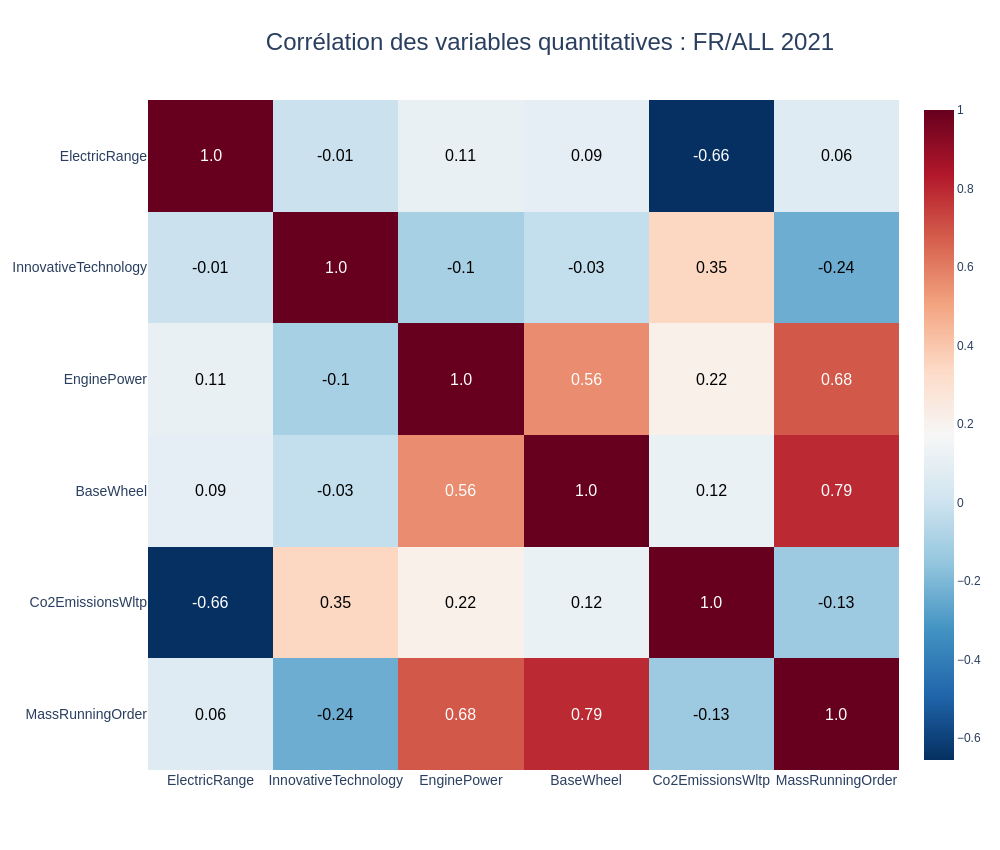

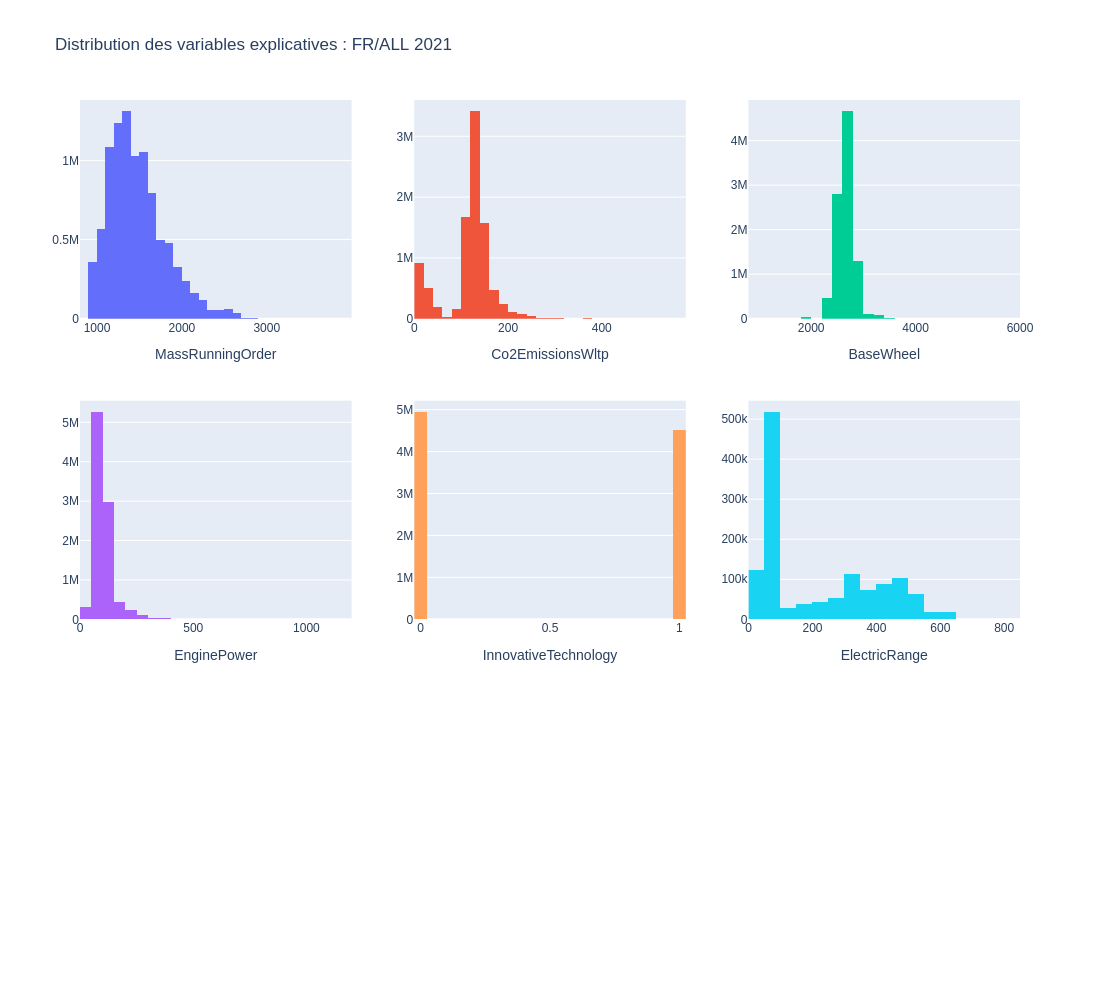

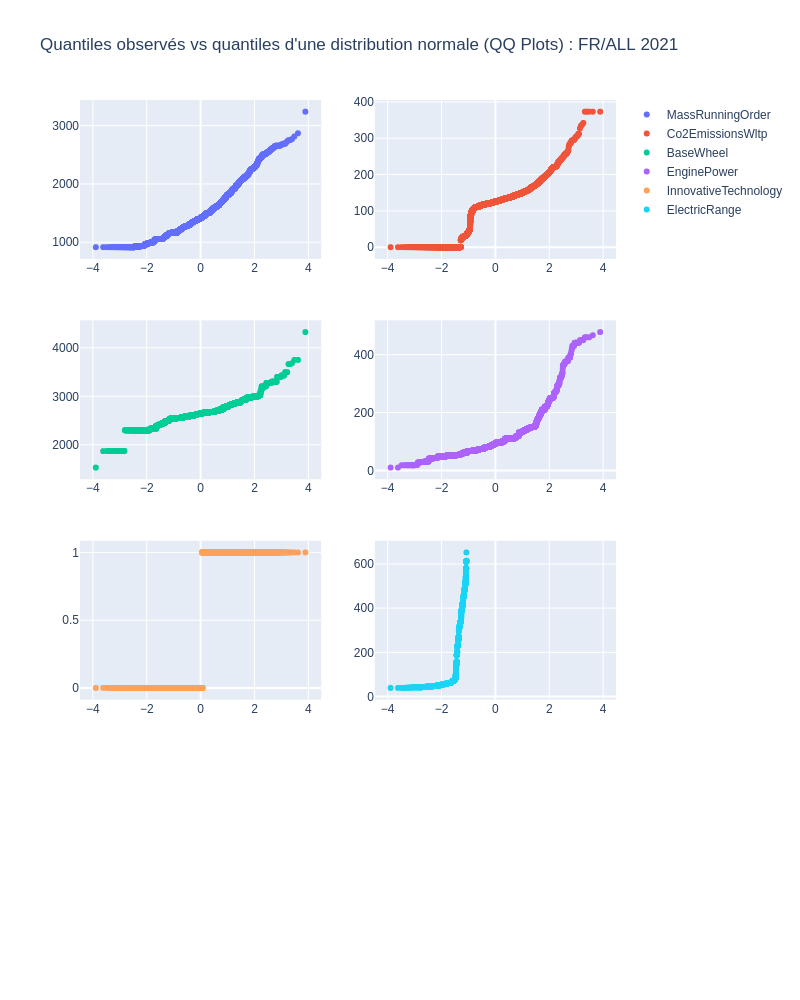

Data saved to ../data/processed/co2_regression_20240115-195601


In [3]:
# Inspection des données
co2.styles.displayer(df, title='APERCU DU JEU DE DONNEES: FR/ALL 2021', save=True)
co2.styles.display_info(df, title='DONNEES BRUTES: FR/ALL 2021', save=True) 
co2.styles.display_na(df, title='PART DE VALEURS MANQUANTES DANS LE JEU DE DONNEES: FR/ALL 2021', save=True)   

# Nettoyage des données
df = co2.data.ml_preprocess(df,
                               #countries=['FR', 'DE'],
                               rem_axlewidth=True,
                               rem_fuel_consumption=True,
                               rem_engine_capacity=True)


# Inspection des features
co2.styles.display_info(df, title='DONNEES NETTOYEES: FR/ALL 2021', save=True) 
co2.styles.display_describe(df, title='STATISTIQUES DESCRIPTIVES: FR/ALL 2021', save=True)

co2.viz.plot_correlation_heatmap(df, save=True, interactive=False, title=': FR/ALL 2021')
co2.viz.plot_feature_distributions(df, interactive=False, save=True, title=': FR/ALL 2021')
co2.viz.plot_qqplots(df, interactive=False, save=True, title=': FR/ALL 2021')

# One-hot encoding des variables catégorielles
df = co2.data.dummify_all_categoricals(df, should_discretize_electricrange=False)
df['ElectricRange'] = df['ElectricRange'].fillna(0)

# Sauvegarde du jeu de données prêt à l'emploi pour la régression
co2.data.save_processed_data(df, classification=False, pickle=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9458570 entries, 0 to 9920107
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MassRunningOrder                 float64
 1   Co2EmissionsWltp                 float64
 2   BaseWheel                        float64
 3   EnginePower                      float64
 4   InnovativeTechnology             int64  
 5   ElectricRange                    float64
 6   Pool_BMW                         int64  
 7   Pool_FORD                        int64  
 8   Pool_HYUNDAI                     int64  
 9   Pool_KIA                         int64  
 10  Pool_MAZDA-SUBARU-SUZUKI-TOYOTA  int64  
 11  Pool_MERCEDES-BENZ               int64  
 12  Pool_RENAULT-NISSAN-MITSUBISHI   int64  
 13  Pool_STELLANTIS                  int64  
 14  Pool_TESLA                       int64  
 15  Pool_VW-SAIC                     int64  
 16  FuelType_DIESEL                  int64  
 17  FuelType_DIES